# TASK 3
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Data set: Social network ads
Data source: kaggle

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
#assuming purchased as target variable
x=df.drop('Purchased',axis=1)
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
#assuming 'x' as feature dataset with a 'gender'column
#performing one-hot encoding
x_encoded=pd.get_dummies(x,columns=['Gender'],drop_first=True)
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)

In [8]:
clf=DecisionTreeClassifier(random_state=42)

In [9]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred=clf.predict(x_test)

In [11]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.89


In [12]:
#Displaying additional metrics
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80



In [13]:
print("\n Comfusion matrix:")
print(confusion_matrix(y_test,y_pred))


 Comfusion matrix:
[[49  3]
 [ 6 22]]


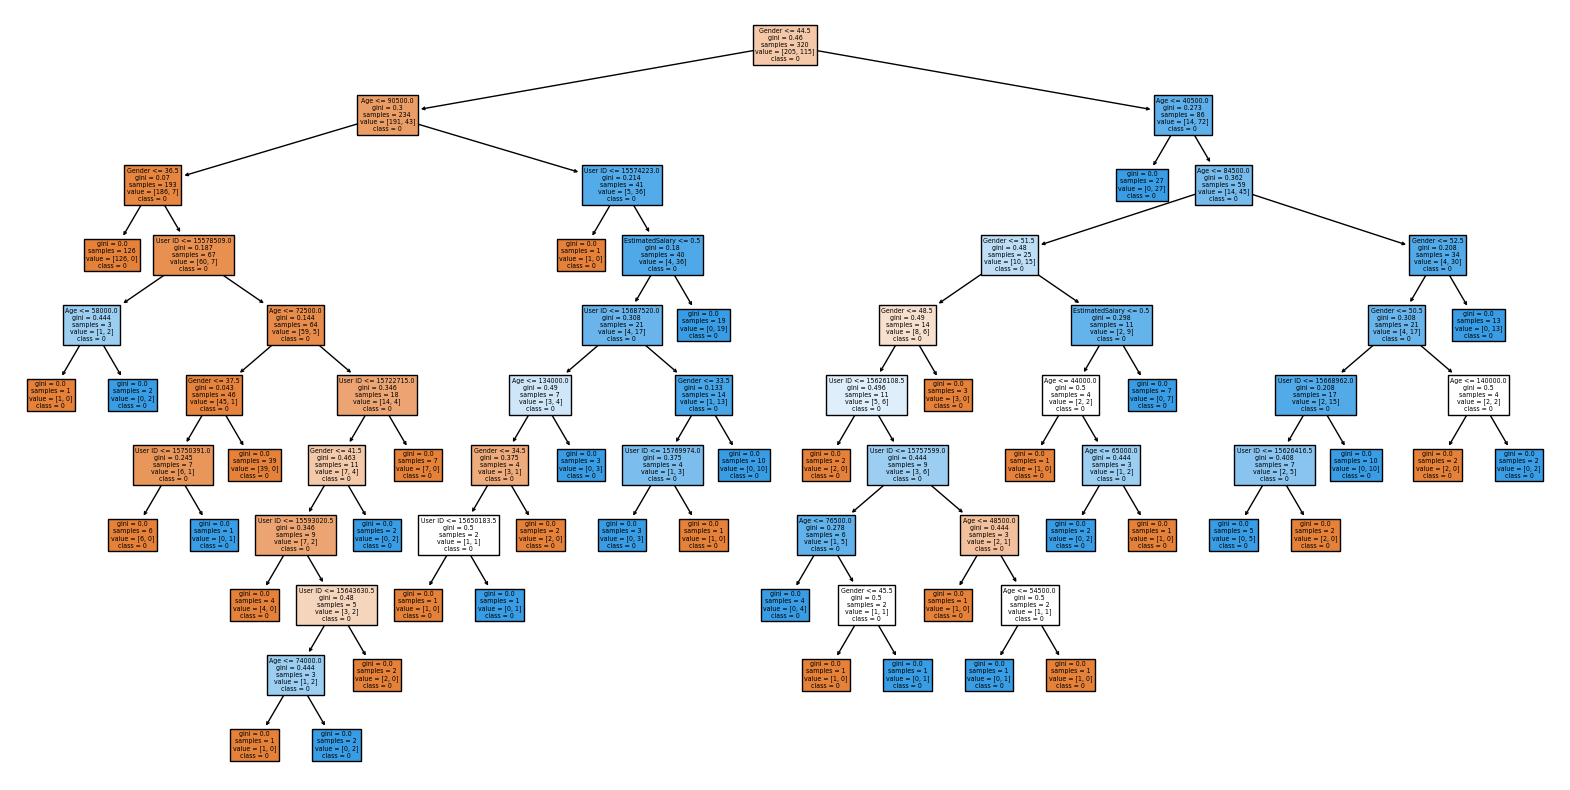

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#assumtion:clf is the tarined decision tree, x is the feature matrix,df['Purchased'] is the target variable
feature_names=list(x.columns)
#converting numeric labels to strings
class_names = list(map(str,df['Purchased']))

plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()

INFERENCE:<br>
The model obtained an accuracy of 0.89.The model shows good precision and recall for both classes,with slightly higher performance for class 0.
The F1-scores indicate a balance between precison and recall fro both classes.
The weighted average F1 -score,considering class imbalance,is 0.89,matching the overall accuracy.
In conclusion,the classification report suggests that the model performs well in distinguishing between 2 classes, with a balanced trade-off between precision and recall.
